In [572]:
import numpy as np
import matplotlib.pyplot as plt
import clustering as cl
import util
import healpy as hp
import importlib as imp
from collections import defaultdict
import seaborn as sns 
from time import time

%matplotlib inline 

In [2]:
# Global parameters
gs = [0.4]
gdots = [-0.004, -0.002, 0.0, 0.002, 0.004]
g_gdots = [(x,y) for x in gs for y in gdots]

nside=8
n = -14
dt=15.0
cr=0.00124
pixels=range(hp.nside2npix(nside))

train_path = 'demo_train/UnnObs_Training_1_line_A_ec_labelled_2457308.5_pm15.0_r2.5.trans'
itf_path = 'demo_itf/itf_new_1_line_ec_2457308.5_pm15.0_r2.5.trans'


In [307]:
# cl.generate_sky_region_files('ryan_data_itf/itf_new_1_line_ec_2457308.5_pm15.0_r2.5.trans', pixels, nside, n)

In [9]:
true_count_set, mergedCounter_dict, mergedTime_dict = cl.accessible_clusters(pixels, infilename=train_path)
true_count = len(true_count_set)
print('True count of clusters: {}'.format(true_count))

right, wrong, ids_right, ids_wrong = cl.test_clusters(pixels, train_path, util.lunation_center(n), \
                                                    dt=dt,rad=cr)

print('Using our optimal parameters we got {0} percent of clusters with {1} percent errors.'.format(right/true_count,wrong/true_count))
print('We got',right,'right and',wrong,'wrong out of total',true_count)

True count of clusters: 890
Starting run...
100%

Run finished!
Using our optimal parameters we got 0.7842696629213484 percent of clusters with 0.0056179775280898875 percent errors.
We got 698 right and 5 wrong out of total 890


In [18]:
tr_results, tr_clust_ids = cl.find_clusters([281], train_path, util.lunation_center(n), g_gdots=g_gdots,dt=dt,rad=cr)

Starting run...
100%

Run finished!


In [198]:
cl = imp.reload(cl)
res_dict = cl.get_res_dict(train_path,[281],nside,n)

In [523]:
# res_dict

In [443]:
agg_dict = defaultdict(list)
for k,v in tr_clust_ids.items():
    # k is the tracklet id, v is the cluster id 
    agg_dict[v].append([tuple([k]+list(i)) for i in res_dict[k]])

In [442]:
# agg_dict
12 in tr_clust_ids.values()

False

In [444]:
po = []
for k,v in agg_dict.items():
    if v!=[]:
        po.append(k)
    else:
        print(type(k))
#         print([ki for ki,vi in tr_clust_ids.items() if vi==12 or vi==11])
np.array(po)

array([1052, 1050,   43,  443,  245,  122, 1123,   69,  273, 1113,  487,
        730,  682,  733,  713,  798,  664,  130,  195,  770,  723,  767,
        735,  193,  842,  161,  734, 1275, 1360,  494,  332, 1571, 1362,
        855,  794,  440,  302,  190,  314, 1114,  345,  416,  241,  512,
        260,  525,  499,  434,  361,  428,  331,  530,  274,  488, 1276,
        848, 1595,  853,  385,  306,  394,  445,  469,  478,  337,  412,
       1662,  352,  433,  526,  360,  442,  362,  438,  517,  439,  858,
        389, 1599,  497,  441, 1714,  492, 1726,  571,  700,  629,  679,
        787,  584,  658,  778,  681,  570,  701,  876,  625,   54,  726,
        824,  732,  757,  668,  561,  674,  667,  724,  631,  656,  677,
        623,  638,  659,  662,  646,  670, 2540,  651,  714,  805,  808,
       2555, 2581, 2588,  725,  706,  729,  708,  812,  809,  665,  731,
        775,  727,  758,  820,  834,  883,  799,  765,  769,  837, 1472,
       1273,  854,  911,  373,  983, 1030, 1009, 13

In [253]:
a_obs3 = [itm for ob in agg_dict[1052] for itm in ob]
# [i[0] for i in a_obs3])
sorted([(i[0],i[1]) for i in a_obs3],key=lambda x: x[1])

[('K13CI6G_018', 2457312.746549),
 ('K13CI6G_018', 2457312.752789),
 ('K13CI6G_018', 2457312.763969),
 ('K13CI6G_018', 2457312.768859),
 ('K13CI6G_018', 2457312.773669),
 ('K13CI6G_019', 2457314.750439),
 ('K13CI6G_019', 2457314.756469),
 ('K13CI6G_019', 2457314.761319),
 ('K13CI6G_019', 2457314.766039),
 ('K13CI6G_019', 2457314.770859),
 ('K13CI6G_020', 2457316.858239),
 ('K13CI6G_020', 2457316.869239),
 ('K13CI6G_020', 2457316.880229),
 ('K13CI6G_020', 2457316.891239)]

In [37]:
print('We have {} observations in cluster id 3'.format(len(a_obs3)))

We have 16 observations in cluster id 3


In [491]:
g,gdot = 0.4,0.0
idx = 2360
cl = imp.reload(cl)
params, loss_val, chisq, chisq_arr = cl.full_fit_t_loss(util.lunation_center(n), g, gdot, agg_dict[idx])

In [492]:
chisq_arr

[10.95120730193689,
 12.329977651639322,
 11.332595170554765,
 10.336123910322627,
 10.590439602398099,
 10.58944311913614,
 10.298373970734342,
 6.9915583632712668,
 7.048193905169934,
 7.5253458594744114,
 7.077844954275573,
 6.7675169205228345,
 7.3018270155147649,
 7.2619196087747468,
 6.8582551621765697,
 6.9267648288674426,
 6.9744664719630762,
 7.1086855281579231,
 13.151677618723104,
 12.956083635063628,
 13.563864111208295,
 12.914698533979328,
 13.285422186737108,
 13.815121757351431,
 19.646751027363528,
 19.606841556719292,
 19.797825103627581,
 20.406742668092999,
 20.275098640521787,
 20.51291285320525,
 20.555951204861113]

In [493]:
util.lunation_center(-14)

2457308.5

In [494]:

a_obs = [ob for trkl in agg_dict[idx] for ob in trkl]
[(ob[0],float(round(ob[3],5)),float(round(ob[4],5)),ch) for ob,ch in zip(a_obs,chisq_arr)]

[('K12D06E_021', -0.12993, 0.02305, 10.95120730193689),
 ('K12D06E_021', -0.12995, 0.02306, 12.329977651639322),
 ('K12D06E_021', -0.12999, 0.02307, 11.332595170554765),
 ('K12D06E_021', -0.13013, 0.02314, 10.336123910322627),
 ('K12D06E_021', -0.13015, 0.02315, 10.590439602398099),
 ('K12D06E_021', -0.13017, 0.02316, 10.58944311913614),
 ('K12D06E_021', -0.13018, 0.02317, 10.298373970734342),
 ('K12D06E_022', -0.13771, 0.02695, 6.9915583632712668),
 ('K12D06E_022', -0.13774, 0.02697, 7.048193905169934),
 ('K12D06E_022', -0.13776, 0.02698, 7.5253458594744114),
 ('K12D06E_022', -0.13778, 0.02699, 7.077844954275573),
 ('K12D06E_022', -0.1378, 0.027, 6.7675169205228345),
 ('K12D06E_022', -0.13792, 0.02706, 7.3018270155147649),
 ('K12D06E_022', -0.13804, 0.02711, 7.2619196087747468),
 ('K12D06E_022', -0.13806, 0.02713, 6.8582551621765697),
 ('K12D06E_022', -0.13811, 0.02716, 6.9267648288674426),
 ('K12D06E_022', -0.13816, 0.02718, 6.9744664719630762),
 ('K12D06E_022', -0.1382, 0.0272, 7.10

In [313]:
agg_dict[12]

[]

In [495]:
cl = imp.reload(cl)
par_results,chi_res  = {},[]
g,gdot = 0.4,0.0
idxs = [1052,443,1815,560,776,2449]
for idx in po:
    all_res = cl.full_fit_t_loss(util.lunation_center(n), g, gdot, agg_dict[idx])
    par_results[idx] = all_res[0]
    chi_res.append(all_res[2])

/Users/paulblankley/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


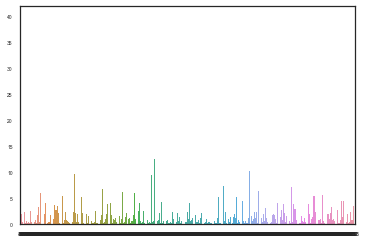

In [511]:
# del_idx = chi_res.index(max(chi_res))
# del chi_res[del_idx]
# del po[del_idx]

sns.barplot(po,chi_res)

# sorted(chi_res,reverse=True)


In [497]:
xx=10.
print('mean rms',np.mean(chi_res),'median rms',np.median(chi_res),\
              'number below {}'.format(xx),len([i for i in chi_res if i<xx]))
print('percent below {}'.format(xx), len([i for i in chi_res if i<xx])/len(chi_res))

mean rms 1.46447423768 median rms 0.674120530258 number below 10.0 696
percent below 10.0 0.9872340425531915


In [499]:
po[chi_res.index(sorted(chi_res,reverse=True)[0])]

2122

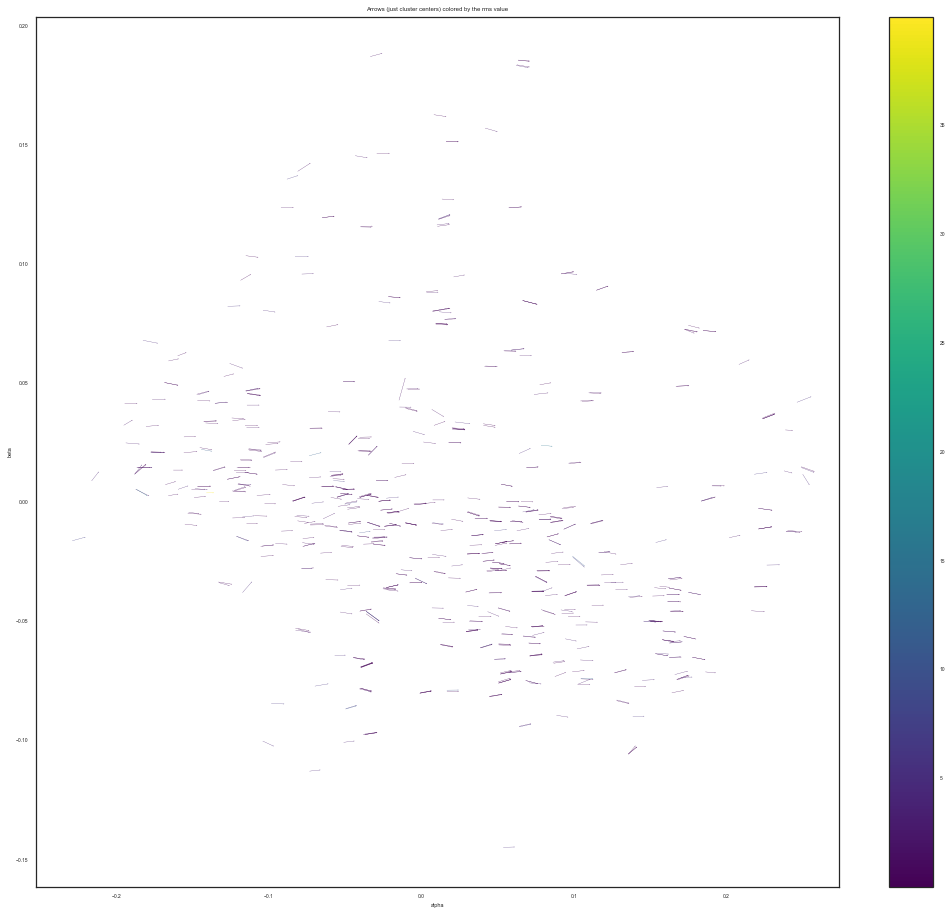

In [501]:
cl = imp.reload(cl)
cl.vis_arrows_by_rms(par_results,chi_res)

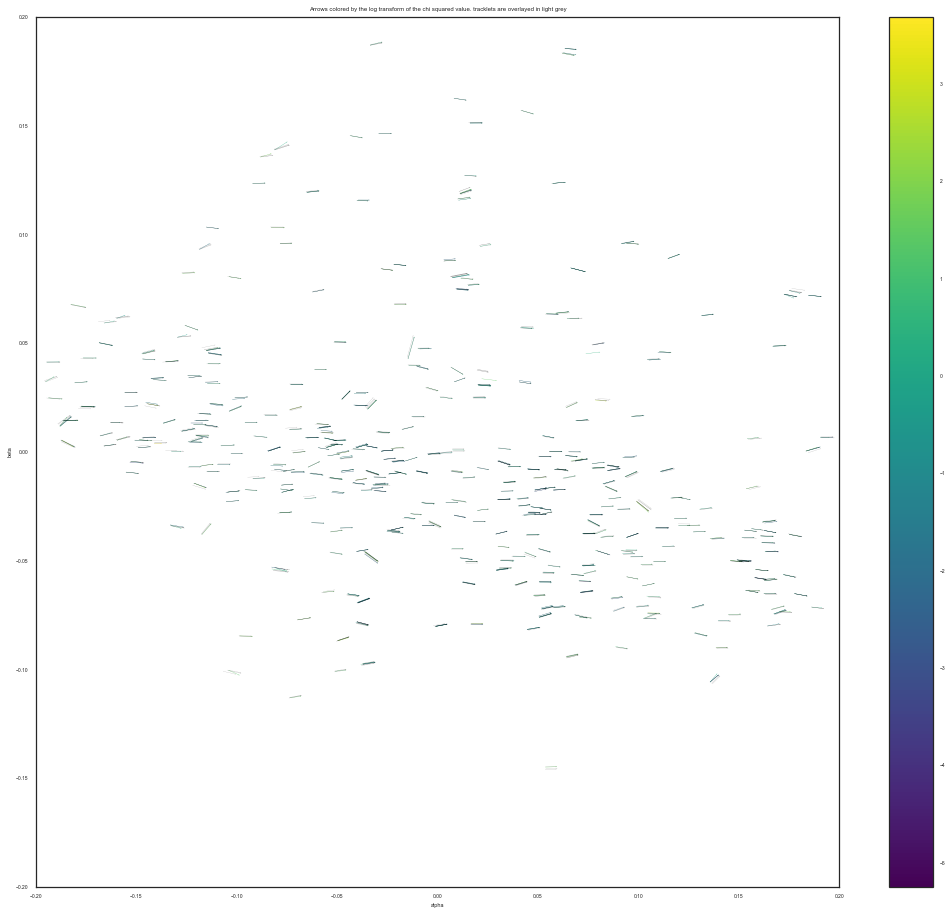

In [508]:
cl = imp.reload(cl)
sns.set(font_scale=.5)
sns.set_style('white')
# ggdots = cl.vis_arrows_by_chi_with_trkl({'k':par_results[2122]},agg_dict,[2122],util.lunation_center(n),chi_res)
ggdots = cl.vis_arrows_by_chi_with_trkl(par_results,agg_dict,po,util.lunation_center(n),chi_res)

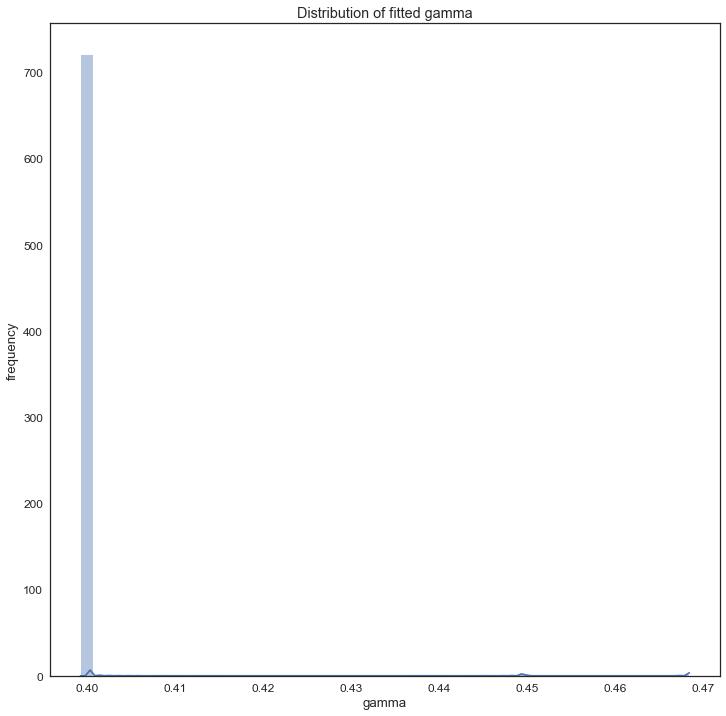

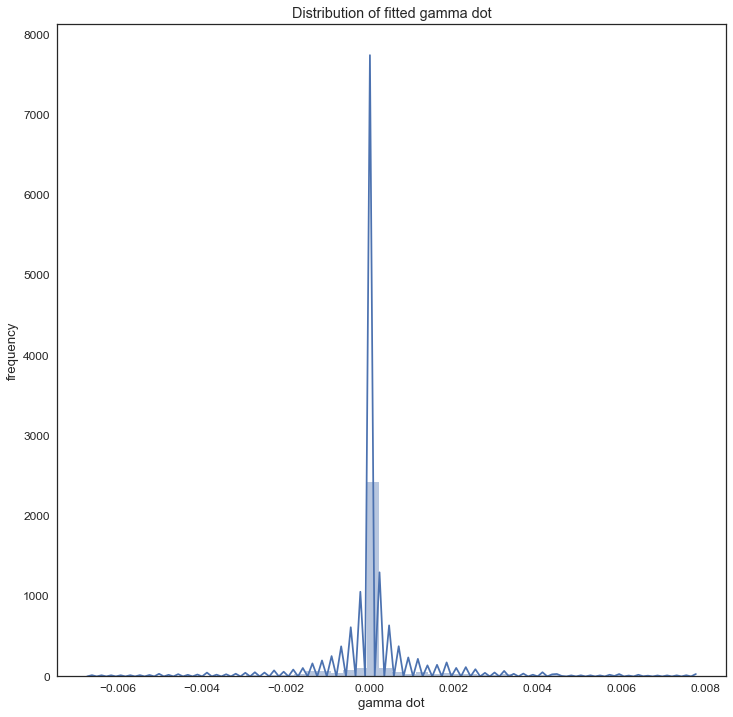

In [516]:
gd_dist = [i[1][0] for i in ggdots]
gdd_dist = [i[1][1] for i in ggdots]
sns.set(font_scale=1.2)
sns.set_style('white')
fig,ax = plt.subplots(figsize=(12,12))
sns.distplot(gd_dist)
plt.title('Distribution of fitted gamma')
plt.xlabel('gamma')
plt.ylabel('frequency')
plt.show()


fig,ax = plt.subplots(figsize=(12,12))
sns.distplot(gdd_dist)
plt.title('Distribution of fitted gamma dot')
plt.xlabel('gamma dot')
plt.ylabel('frequency')
plt.show()

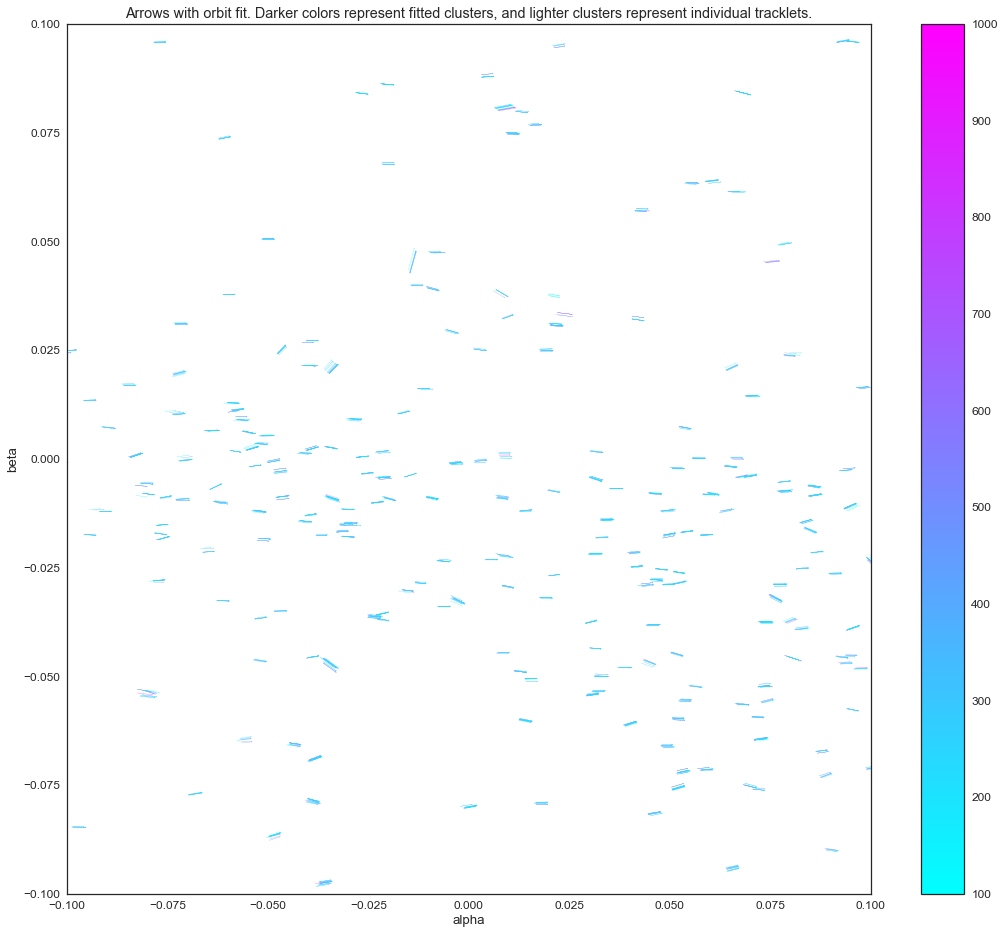

In [426]:
cl = imp.reload(cl)
cl.visualize(par_results,agg_dict,po,util.lunation_center(n))

In [519]:
chir = np.array(chi_res)
ch_one_sd = [i for i in chir if i<(chir.mean()+chir.std())]

In [520]:
chir.mean(), np.median(chir), chir.std()

(1.4644742376761675, 0.67412053025828544, 2.4509369709635194)

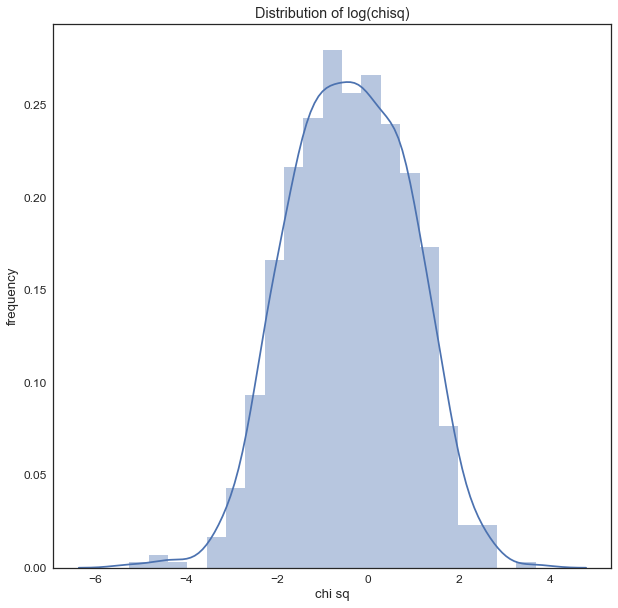

In [521]:
fig,ax = plt.subplots(figsize=(10,10))
sns.distplot(np.log(chir))
plt.title('Distribution of log(chisq)')
plt.xlabel('chi sq')
plt.ylabel('frequency')
plt.show()

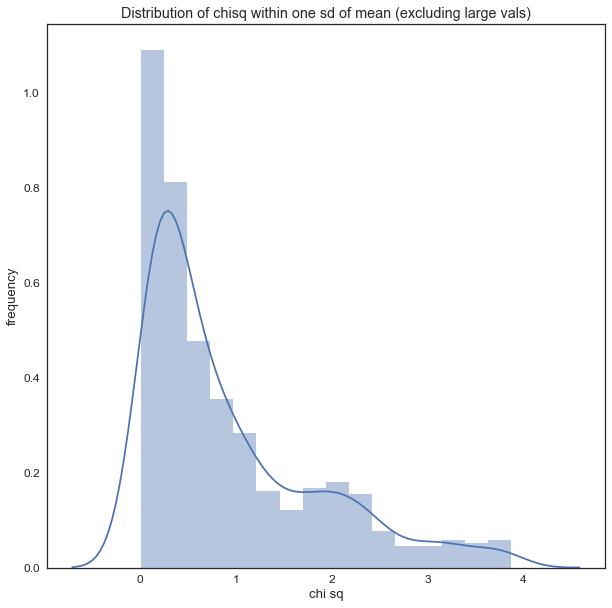

In [522]:
fig,ax = plt.subplots(figsize=(10,10))
sns.distplot(ch_one_sd)
plt.title('Distribution of chisq within one sd of mean (excluding large vals)')
plt.xlabel('chi sq')
plt.ylabel('frequency')
plt.show()

In [576]:
t0 = time()
cl = imp.reload(cl)
results_ext = cl.fit_extend(train_path, tr_clust_ids,pixels,nside,n,new_rad=0.00124)
print('time elapsed for one run of a month .trans file',time()-t0)

time elapsed for one run of a month .trans file 68.36729216575623


In [565]:
results_ext[0]==tr_results

False

In [577]:
cl.generate_sky_region_files(train_path,[281],8,-14.,cluster_id_dict=results_ext[1])

In [578]:
import visual
visual.make_figure('demo_train/UnnObs_Training_1_line_A_ec_labelled_2457308.5_pm15.0_r2.5_hp_281_g0.40_gdot+0.0e+00_cid',cluster=True,outpath='pixel_281_post_extend')